In [64]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2, r_regression
from scipy import stats
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import svm
from sklearn.feature_selection import SequentialFeatureSelector

In [4]:
import os

os.listdir('../../dataset/extracted_features/extracted_features.csv')

['extracted_features.csv']

In [11]:
cleaned_df=pd.read_csv('../../dataset/extracted_features/extracted_features.csv')
cleaned_df.set_index('url',inplace=True)
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [12]:
cleaned_df

,phishing,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
selector = VarianceThreshold()
selector.fit_transform(cleaned_df)

array([[  0,   0,  37, ...,   0,   0,   0],
       [  1,   0,  77, ...,   0,   0,   0],
       [  1,   1, 126, ...,   0,   0,   0],
       ...,
       [  0,   1, 105, ...,   0,   0,   0],
       [  0,   0,  38, ...,   0,   0,   0],
       [  1,   0, 477, ...,   0,   0,   0]], dtype=int64)

In [15]:
removed=cleaned_df.loc[:, ~selector.get_support()]
removed.columns

Index(['hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_asterisk_count', 'hostname_hashtag_count',
       'hostname_dollar_count', 'hostname_percent_count',
       'query_hashtag_count', 'file_slash_count', 'file_questionmark_count',
       'file_space_count', 'file_hashtag_count', 'file_dollar_count'],
      dtype='object')

In [16]:
cleaned_df=cleaned_df.loc[:, selector.get_support()]

In [17]:
cleaned_df

,phishing,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def pointbiserialrcorr(features,label):
    corr_value=np.empty((0, 0))
    p_value=corr_value=np.empty((0, 0))
    features=features.T
    for i in range(len(features)):
        corr, p=stats.pointbiserialr(features[i],label)
        corr_value=np.append(corr_value,corr)
        p_value=np.append(p_value,p)
    return corr_value,p_value

In [19]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


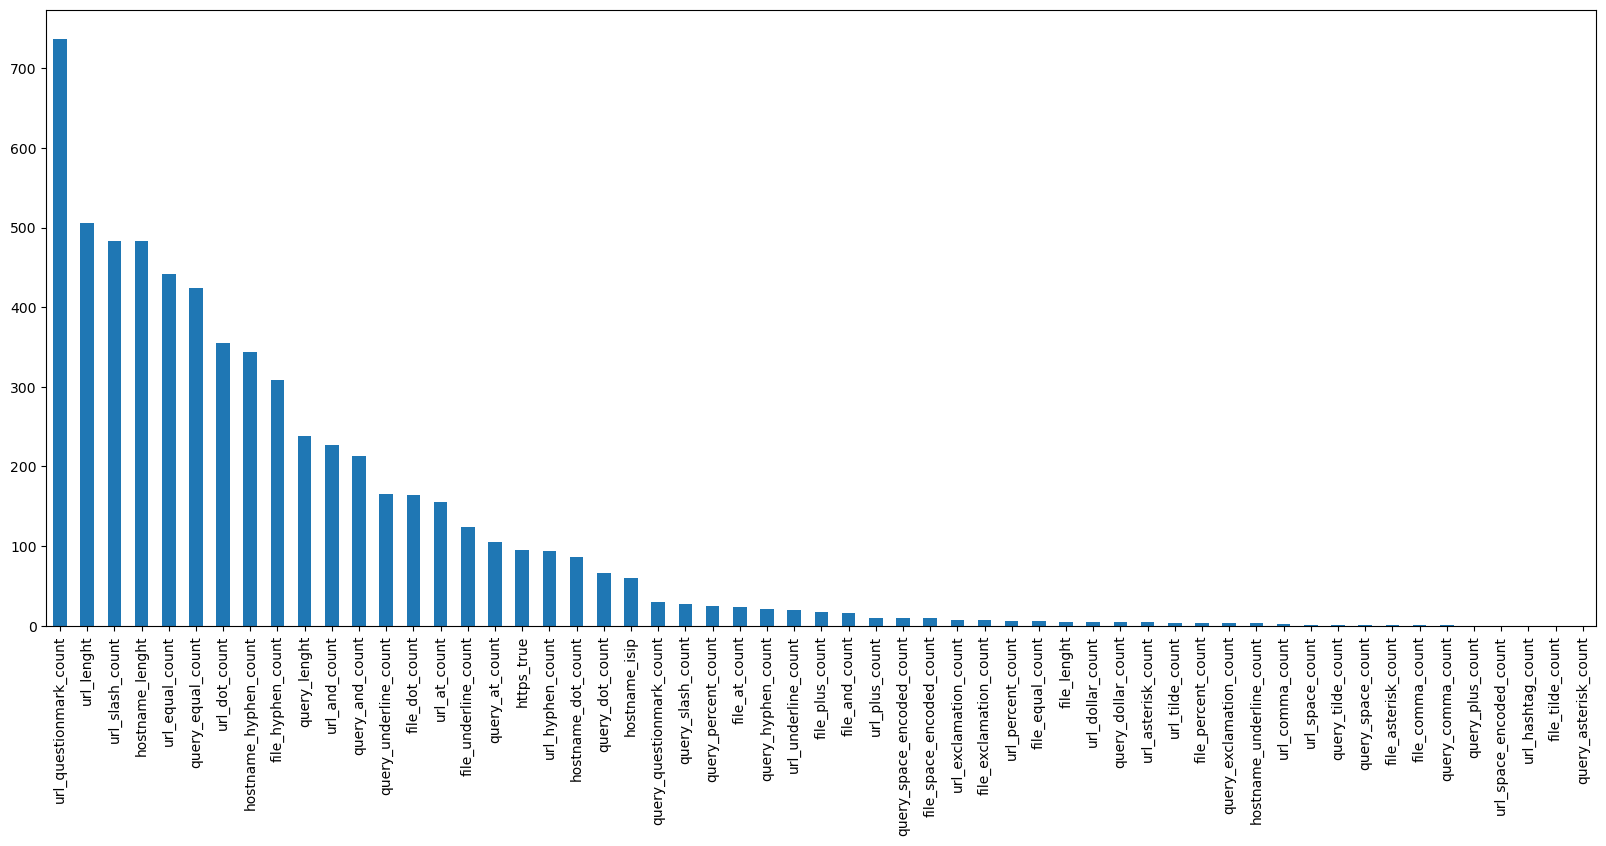

In [40]:
fc = SelectKBest(score_func=f_classif, k='all')
fc.fit(X_train,y_train)
anova =pd.Series(fc.scores_)
anova.index = X_train.columns
plot =anova.sort_values(ascending=False).plot.bar(figsize=(20, 8))

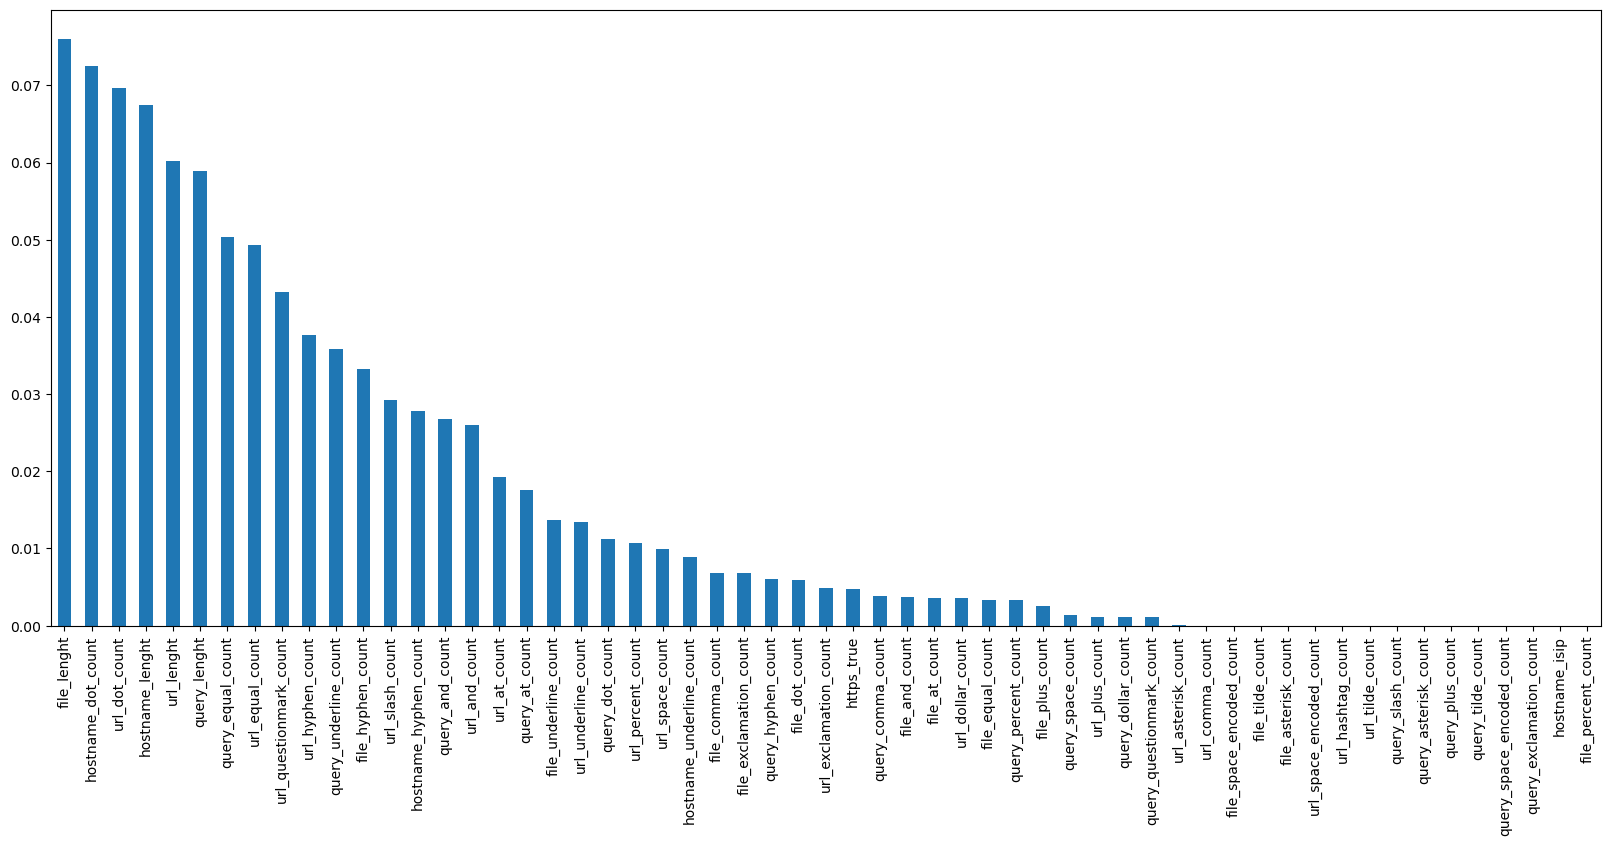

In [49]:
mic=SelectKBest(score_func=mutual_info_classif, k='all')
mic.fit(X_train,y_train)
mutual_info = pd.Series(mic.scores_)
mutual_info.index = X_train.columns
plot =mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

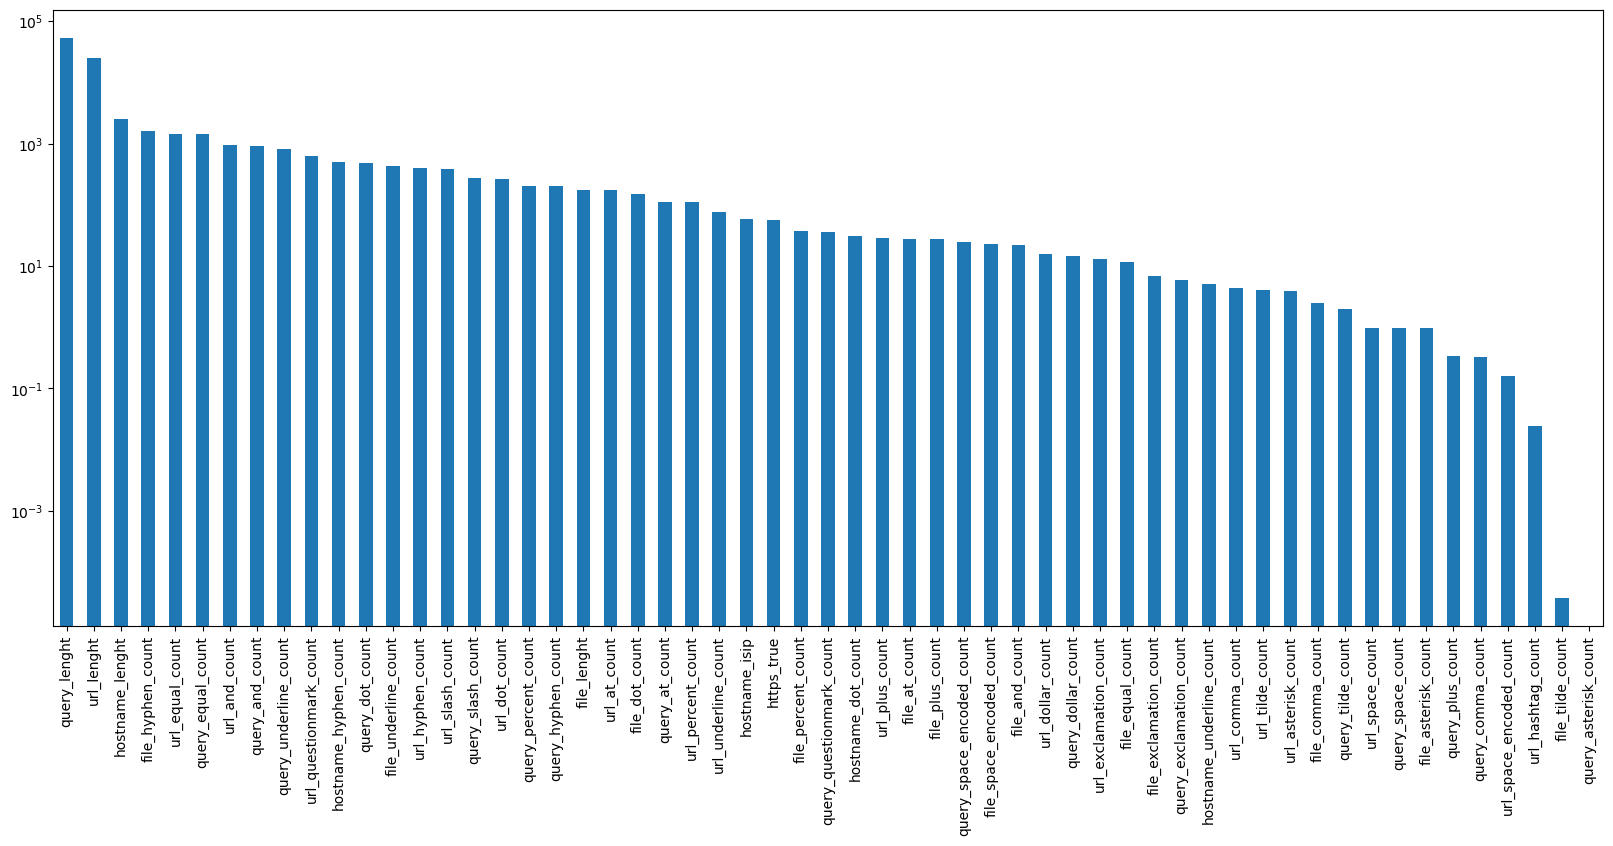

In [51]:
ch=SelectKBest(score_func=chi2, k='all')
ch.fit(X_train,y_train)
ch2 = pd.Series(ch.scores_)
ch2.index = X_train.columns
plot =ch2.sort_values(ascending=False).plot.bar(figsize=(20, 8),logy=True)

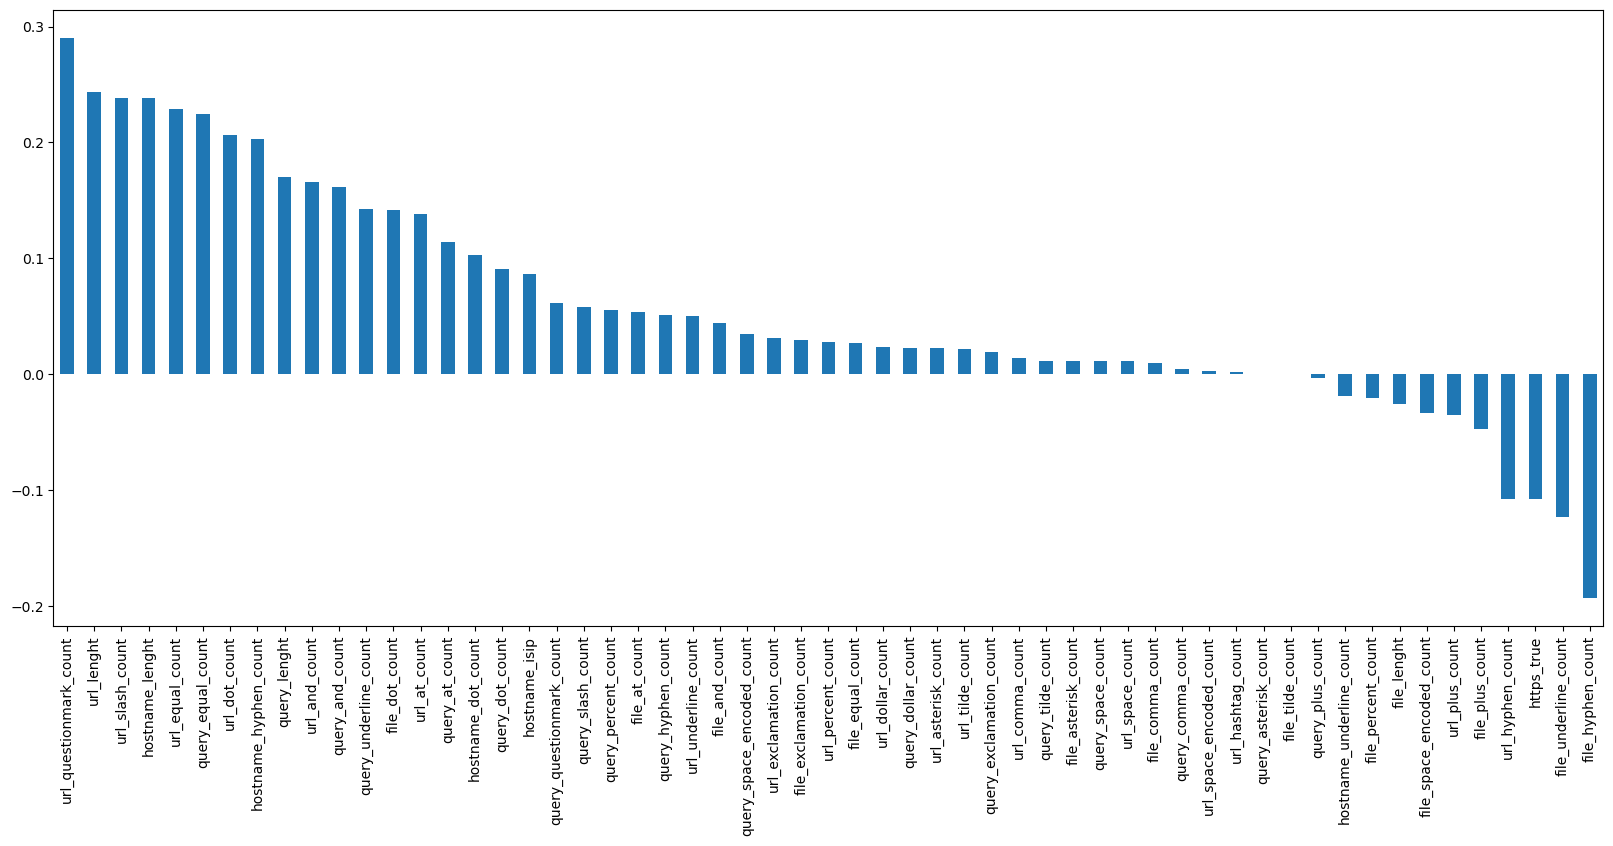

In [53]:
pc=SelectKBest(score_func=r_regression, k='all')
pc.fit(X_train,y_train)
pearson = pd.Series(pc.scores_)
pearson.index = X_train.columns
plot =pearson.sort_values(ascending=False).plot.bar(figsize=(20, 8))

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


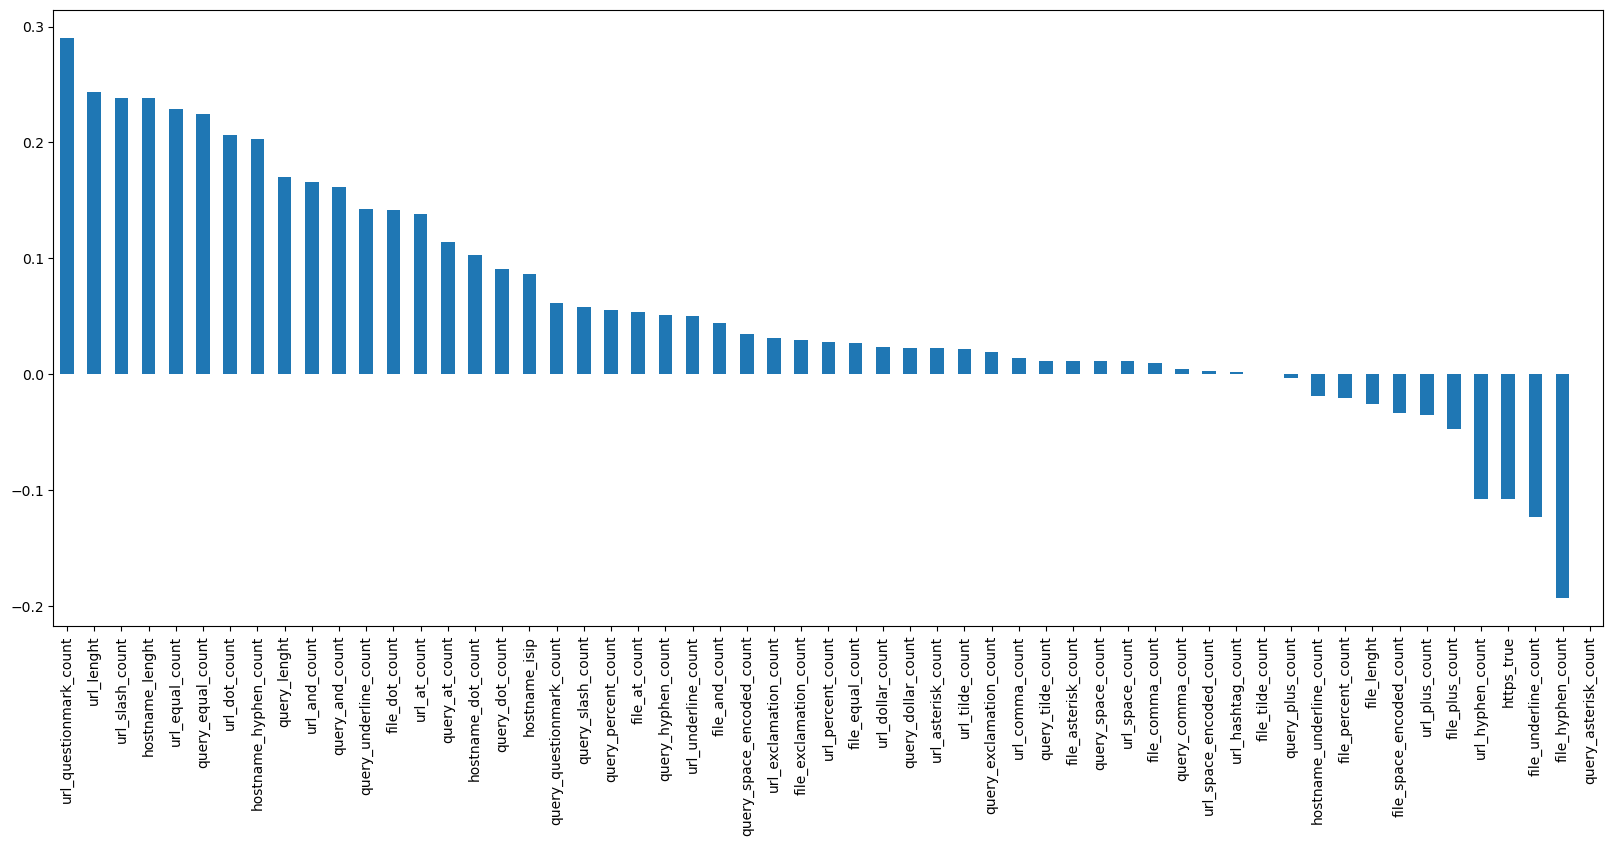

In [29]:
pbc=SelectKBest(score_func=pointbiserialrcorr, k='all')
pbc.fit(X_train,y_train)
pointbiserial = pd.Series(pbc.scores_)
pointbiserial.index = X_train.columns
plot =pointbiserial.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# Feature selection was performed with each filter and documented in the Excel list. 

In [58]:
fc = SelectKBest(score_func=f_classif, k=30)
fc.fit(X_train,y_train)
X_train_selected=X_train.loc[:, fc.get_support()]
X_test_selected=X_test.loc[:, fc.get_support()]

c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [40] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\patri\anaconda3\envs\phishing\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [60]:
X_train_selected

,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,query_equal_count,query_at_count,query_and_count,query_percent_count,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,1,44,2,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,0,88,8,0,0,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,0,88,3,0,1,6,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,1,154,6,0,4,7,1,3,1,2,...,3,1,2,0,1,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,0,49,2,0,0,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,0,52,1,0,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,0,41,3,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,0,36,3,0,0,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


[LibSVM]Accuracy: 0.7147856517935258
Recall: 0.5250441956393636


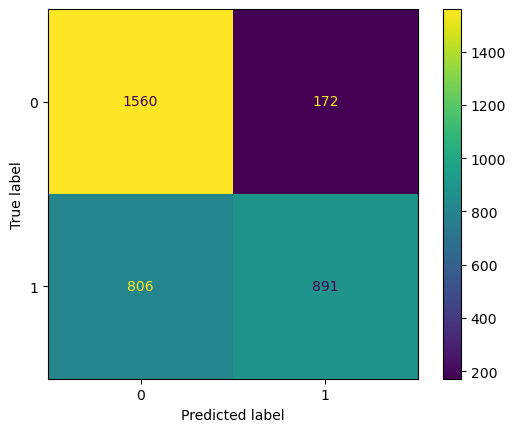

In [63]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
sfs = SequentialFeatureSelector(clf,n_features_to_select=30,scoring='accuracy')

In [ ]:
X_test_sfs_selected=X_test.loc[:, sfs.get_support()]
X_train_sfs_selected=X_train.loc[:, sfs.get_support()]

In [68]:
X_test_sfs_selected=X_test.loc[:,['url_underline_count', 'url_hyphen_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'url_exclamation_count', 'url_space_count',
       'url_comma_count', 'url_plus_count', 'url_asterisk_count',
       'url_dollar_count', 'hostname_dot_count', 'hostname_underline_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_slash_count',
       'query_questionmark_count', 'query_at_count', 'query_space_count',
       'query_space_encoded_count', 'query_tilde_count', 'file_dot_count',
       'file_underline_count', 'file_hyphen_count', 'file_equal_count',
       'file_and_count', 'file_exclamation_count', 'file_space_encoded_count']]

In [69]:
X_train_sfs_selected=X_train.loc[:,['url_underline_count', 'url_hyphen_count', 'url_slash_count',
       'url_questionmark_count', 'url_equal_count', 'url_at_count',
       'url_and_count', 'url_exclamation_count', 'url_space_count',
       'url_comma_count', 'url_plus_count', 'url_asterisk_count',
       'url_dollar_count', 'hostname_dot_count', 'hostname_underline_count',
       'hostname_hyphen_count', 'hostname_isip', 'query_slash_count',
       'query_questionmark_count', 'query_at_count', 'query_space_count',
       'query_space_encoded_count', 'query_tilde_count', 'file_dot_count',
       'file_underline_count', 'file_hyphen_count', 'file_equal_count',
       'file_and_count', 'file_exclamation_count', 'file_space_encoded_count']]

[LibSVM]Accuracy: 0.7716535433070866
Recall: 0.7153800824985268


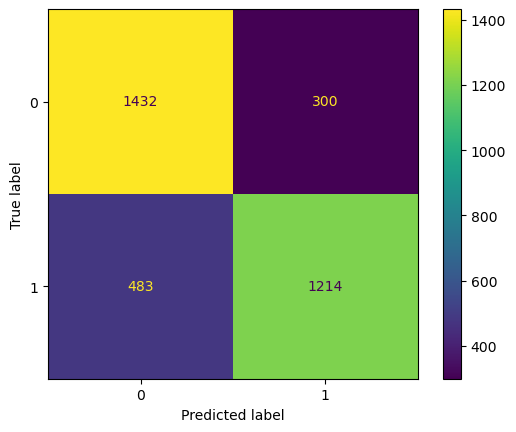

In [70]:
clf = svm.SVC(verbose=True)
clf.fit(X_train_sfs_selected, y_train)
y_pred = clf.predict(X_test_sfs_selected)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()